In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

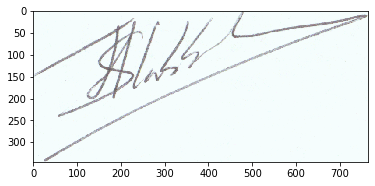

In [11]:
import matplotlib.pyplot as plt
img = plt.imread('input/sign_data/test/050/01_050.png')
plt.imshow(img)

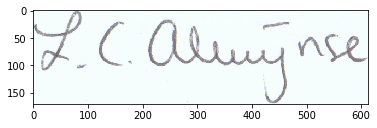

In [12]:
img1 = plt.imread('input/sign_data/train/002/002_01.png')
plt.imshow(img1)

In [13]:
import os
import glob
import cv2
train_data = []
train_labels = []

for per in os.listdir('input/sign_data/train/'):
    for data in glob.glob('input/sign_data/train/'+per+'/*.*'):
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224,224))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

In [15]:
test_data = []
test_labels = []

for per in os.listdir('input/sign_data/test/'):
    for data in glob.glob('input/sign_data/test/'+per+'/*.*'):
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224,224))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(np.array(1))
        else:
            test_labels.append(np.array(0))

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)


In [17]:
from keras.utils import to_categorical
from sklearn.utils import shuffle
train_labels = to_categorical(train_labels)
train_data.shape

(1649, 1, 224, 224, 3)

In [18]:
train_data = train_data.reshape(-1, 224,224, 3)
test_data = test_data.reshape(-1, 224,224, 3)

In [39]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam

network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
network.add(MaxPooling2D(3,3))
network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(2,2))
network.add(Flatten())
network.add(Dense(128,activation = 'relu'))
network.add(Dropout(rate=0.3))
network.add(Dense(2,activation = 'softmax'))

network.compile(optimizer=Adam(lr=0.00001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [40]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 5
BS = 1
progess = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/5
1566/1566 [==============================] - 190s 121ms/step - loss: 0.6981 - accuracy: 0.5326 - val_loss: 0.6853 - val_accuracy: 0.4578
Epoch 2/5
1566/1566 [==============================] - 171s 109ms/step - loss: 0.6377 - accuracy: 0.6501 - val_loss: 0.5421 - val_accuracy: 0.8554
Epoch 3/5
1566/1566 [==============================] - 173s 111ms/step - loss: 0.5085 - accuracy: 0.7727 - val_loss: 0.4166 - val_accuracy: 0.8193
Epoch 4/5
1566/1566 [==============================] - 167s 107ms/step - loss: 0.4073 - accuracy: 0.8289 - val_loss: 0.3628 - val_accuracy: 0.8193
Epoch 5/5
1566/1566 [==============================] - 160s 102ms/step - loss: 0.3573 - accuracy: 0.8557 - val_loss: 0.2958 - val_accuracy: 0.9157


In [42]:
predictions=network.predict_classes(test_data)

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(test_labels,predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       252
           1       0.94      0.81      0.87       248

    accuracy                           0.88       500
   macro avg       0.89      0.88      0.88       500
weighted avg       0.89      0.88      0.88       500



In [46]:
print(confusion_matrix(test_labels,predictions))

[[239  13]
 [ 46 202]]
